# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import json
import tf_keras
import tensorflow_hub as hub

In [3]:
# s TODO: Load the dataset with TensorFlow Datasets.

splits = ['train[:80%]', 'train[80%:]', 'test']

data, dataset_info = tfds.load('oxford_flowers102', as_supervised=True, with_info=True, split=splits)

# TODO: Create a training set, a validation set and a test set.
training_set, valid, test = data

In [4]:
num_training_examples = dataset_info.splits["train"].num_examples
num_validation_examples = int(0.2 * num_training_examples)  
num_test_examples = dataset_info.splits["test"].num_examples

print(f"Training examples: {num_training_examples - num_validation_examples}")
print(f"Validation examples: {num_validation_examples}")
print(f"Test examples: {num_test_examples}")


Training examples: 816
Validation examples: 204
Test examples: 6149


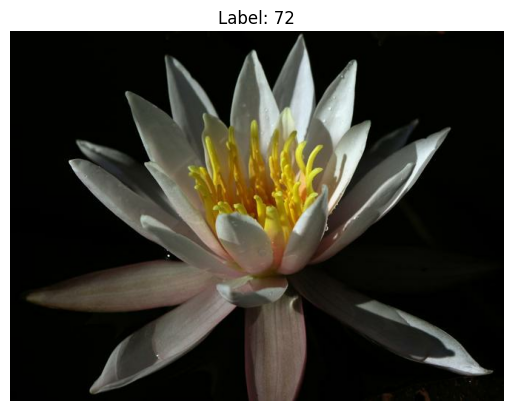

In [5]:
# TODO: Plot 1 image from the training set. Set the title 
for image, label in training_set.take(1):
    plt.imshow(image)
    plt.title(f'Label: {label.numpy()}')
    plt.axis('off')
    plt.show()

In [6]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

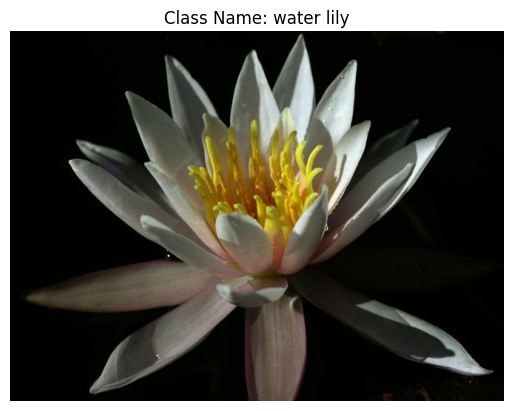

In [ ]:
# TODO: Plot 1 image from the training set. Set the title 
for image, label in training_set.take(1):
    plt.imshow(image)
    plt.title(f'Class Name: {class_names[str(label.numpy())]}')
    plt.axis('off')
    plt.show()

# Size of first three images
for image, label in training_set.take(3):
        print(np.shape(image))

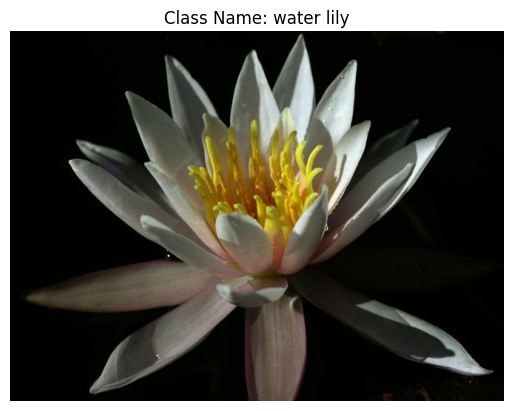

In [8]:
# TODO: Plot 1 image from the training set. Set the title 
for image, label in training_set.take(1):
    plt.imshow(image)
    plt.title(f'Class Name: {class_names[str(label.numpy())]}')
    plt.axis('off')
    plt.show()

## Create Pipeline

In [9]:
def normalize(image, label):
    image = tf.image.resize(image, [224, 224]) 
    image = image / 255.0  
    return image, label

batch_size = 64
training_batches = training_set.cache().map(normalize).batch(batch_size).prefetch(1)
valid_batches = valid.cache().map(normalize).batch(batch_size).prefetch(1)
testing_batches = test.cache().map(normalize).batch(batch_size).prefetch(1)

In [19]:
# TODO: Build and train your network.

import matplotlib.pyplot as plt


feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url, input_shape=(224, 224, 3), trainable=False)

model = tf_keras.Sequential([
           feature_extractor_layer,
           tf_keras.layers.Dense(256, activation = 'relu'),
           tf_keras.layers.Dropout(0.2),
           tf_keras.layers.Dense(128, activation = 'relu'),
           tf_keras.layers.Dropout(0.2),
           tf_keras.layers.Dense(102, activation = 'softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(
    training_batches,
    epochs=20,
    validation_data=valid_batches
)

Epoch 1/20
13/13 [==============================] - 8s 522ms/step - loss: 4.6640 - accuracy: 0.0172 - val_loss: 4.4955 - val_accuracy: 0.0441
Epoch 2/20
13/13 [==============================] - 6s 485ms/step - loss: 4.2567 - accuracy: 0.0968 - val_loss: 4.1992 - val_accuracy: 0.1127
Epoch 3/20
13/13 [==============================] - 6s 478ms/step - loss: 3.6882 - accuracy: 0.2096 - val_loss: 3.7050 - val_accuracy: 0.2206
Epoch 4/20
13/13 [==============================] - 6s 479ms/step - loss: 2.9199 - accuracy: 0.3554 - val_loss: 3.0926 - val_accuracy: 0.3775
Epoch 5/20
13/13 [==============================] - 6s 480ms/step - loss: 2.2473 - accuracy: 0.4755 - val_loss: 2.5052 - val_accuracy: 0.4608
Epoch 6/20
13/13 [==============================] - 6s 483ms/step - loss: 1.6756 - accuracy: 0.6262 - val_loss: 2.0541 - val_accuracy: 0.5196
Epoch 7/20
13/13 [==============================] - 6s 482ms/step - loss: 1.2771 - accuracy: 0.7022 - val_loss: 1.7403 - val_accuracy: 0.5980
Epoch 

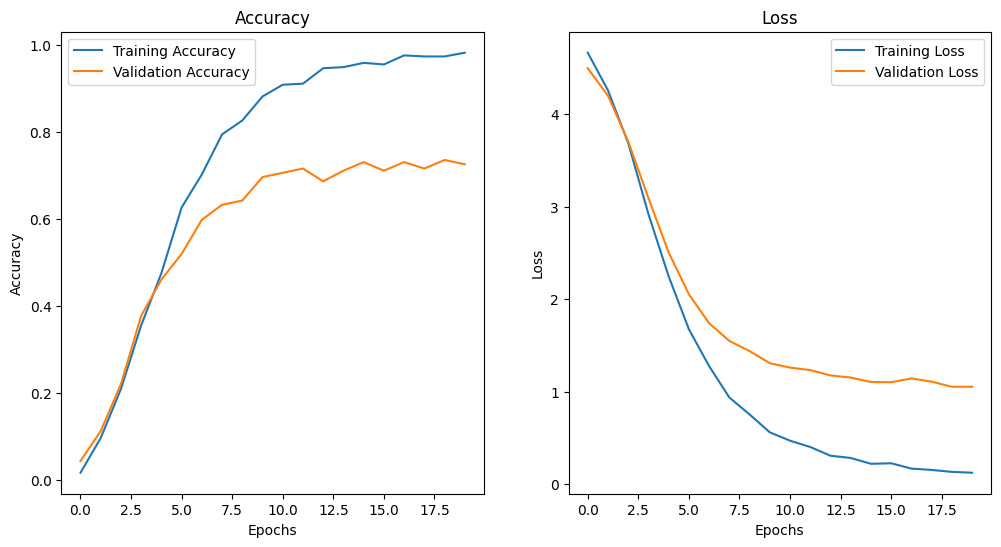

In [20]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
test_loss, test_accuracy = model.evaluate(testing_batches)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


97/97 [==============================] - 37s 381ms/step - loss: 1.1199 - accuracy: 0.7167
Test Loss: 1.119923710823059
Test Accuracy: 0.7167019248008728


In [24]:
# TODO: Save your trained model as a Keras model.

model.save('flower_classifier.h5')

In [25]:
reloaded_model =  tf_keras.models.load_model('flower_classifier.h5', custom_objects={'KerasLayer': hub.KerasLayer})

# Evaluate the reloaded model
test_loss, test_accuracy = reloaded_model.evaluate(testing_batches)
print(f"Reloaded Test Loss: {test_loss}")
print(f"Reloaded Test Accuracy: {test_accuracy}")

97/97 [==============================] - 39s 395ms/step - loss: 1.1199 - accuracy: 0.7167
Reloaded Test Loss: 1.119923710823059
Reloaded Test Accuracy: 0.7167019248008728


In [26]:
# TODO: Create the process_image function
def process_image(image):
    image_tf = tf.convert_to_tensor(image)
    resized_image = tf.image.resize(image_tf, [224, 224])    
    image = resized_image / 255.0
    np_image = np.asarray(image)
    return np_image
    

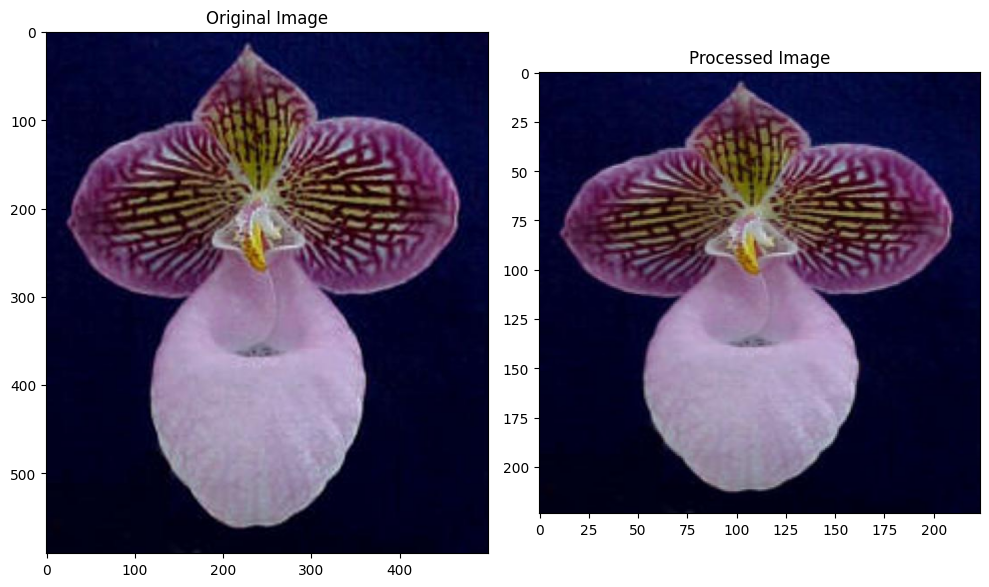

In [27]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

In [28]:
#Extra by me for automation purposes
import os

# Directory to search
directory_path = r"C:\Users\F\Desktop\course\jup\test_images"

# List to store jpg file paths
jpg_files = []

# Walk through the directory
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith(".jpg"):
            jpg_files.append(os.path.join(root, file))

print(jpg_files)


['C:\\Users\\F\\Desktop\\course\\jup\\test_images\\cautleya_spicata.jpg', 'C:\\Users\\F\\Desktop\\course\\jup\\test_images\\hard-leaved_pocket_orchid.jpg', 'C:\\Users\\F\\Desktop\\course\\jup\\test_images\\orange_dahlia.jpg', 'C:\\Users\\F\\Desktop\\course\\jup\\test_images\\wild_pansy.jpg']


In [29]:
# TODO: Create the predict function
def predict(image_path, model, top_k=5):
    # Process the image
    image = Image.open(image_path)
    image = np.asarray(image)  # Convert PIL image to NumPy array
    processed_image = process_image(image)  # Process the image
    
    # Add the extra batch dimension (model expects a batch)
    image = np.expand_dims(processed_image, axis=0)  # Shape becomes (1, 224, 224, 3)
    
    # Get the class probabilities from the model
    predictions = model.predict(image)  # Model expects shape (batch_size, height, width, channels)
    
    # Sort the predictions to get top K
    top_k_indices = np.argsort(predictions[0])[::-1][:top_k]  # Sort in descending order and select top K
    top_k_probs = predictions[0][top_k_indices]
     # Handle the case where class_names is a list or dictionary
    if isinstance(class_names, dict):
        # class_names is a dictionary with class index as key (string)
        top_k_classes = [class_names[str(idx)] for idx in top_k_indices]
    else:
        # class_names is a list, so we can directly use the index
        top_k_classes = [class_names[idx] for idx in top_k_indices]
    
    return top_k_probs, top_k_classes

1/1 [==============================] - 0s 304ms/step
Top 5 predictions:
cautleya spicata: 0.9766
red ginger: 0.0157
snapdragon: 0.0010
lotus: 0.0008
wallflower: 0.0007


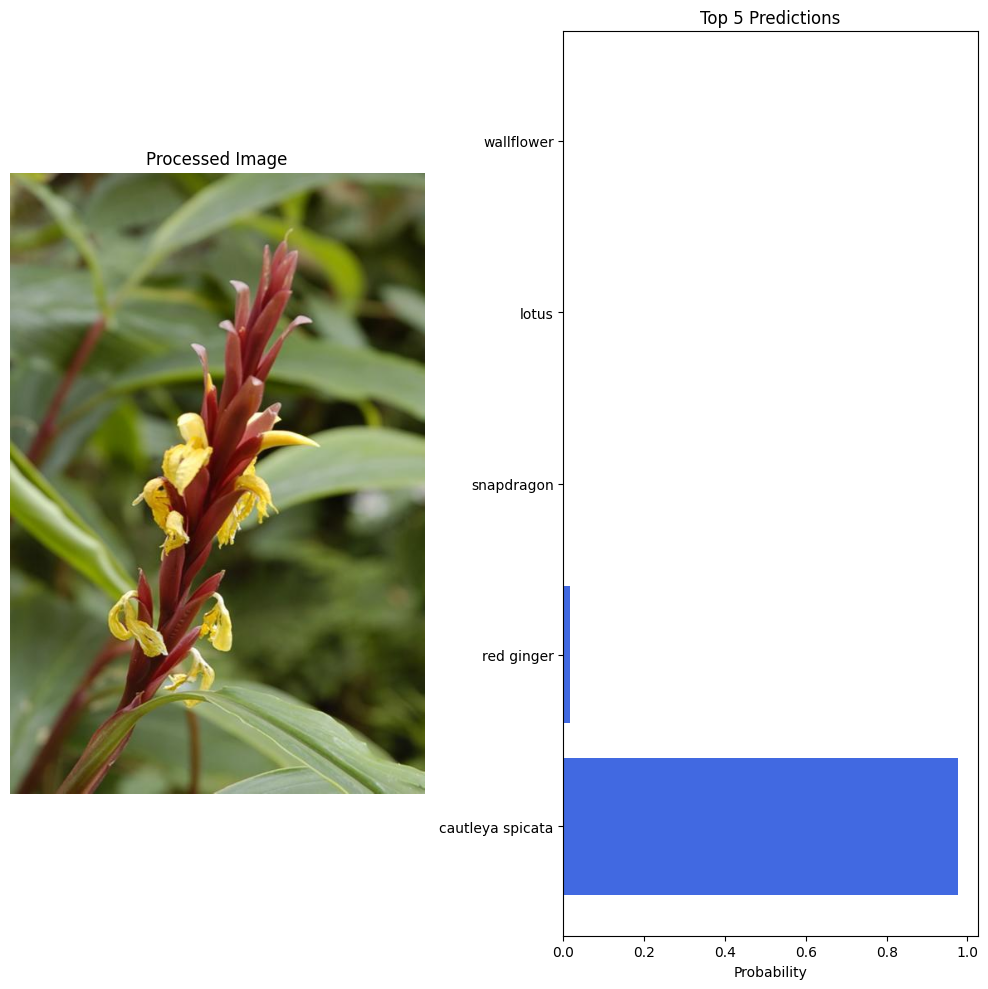

1/1 [==============================] - 0s 83ms/step
Top 5 predictions:
hard-leaved pocket orchid: 0.9997
moon orchid: 0.0001
bearded iris: 0.0000
anthurium: 0.0000
gaura: 0.0000


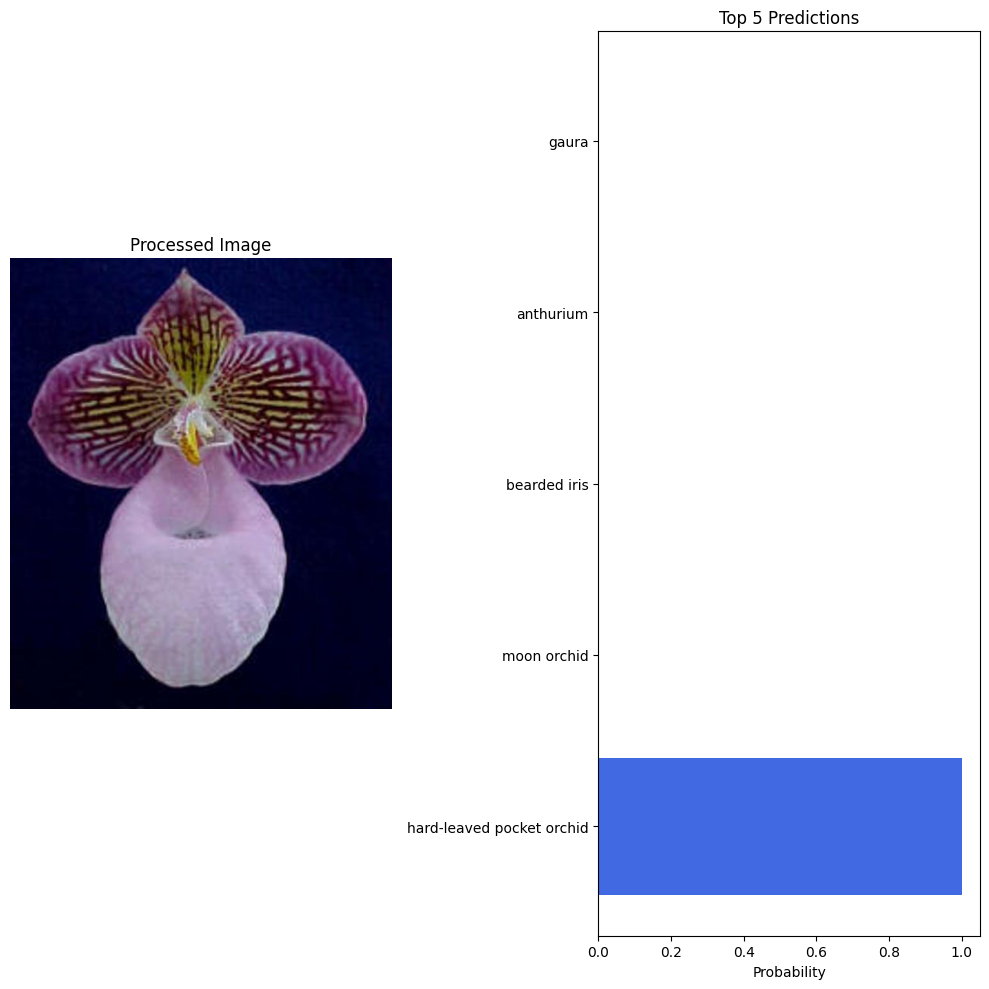

1/1 [==============================] - 0s 80ms/step
Top 5 predictions:
english marigold: 0.7696
orange dahlia: 0.0897
black-eyed susan: 0.0350
barbeton daisy: 0.0325
osteospermum: 0.0235


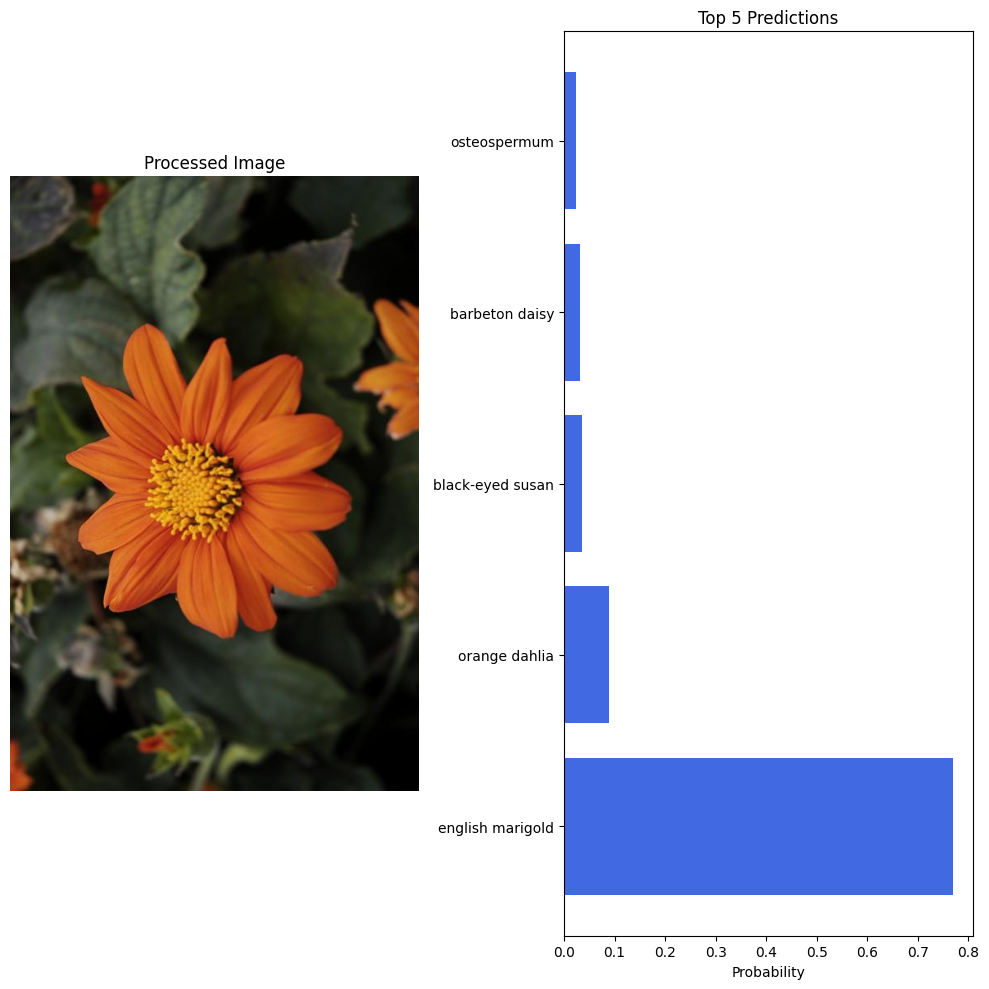

1/1 [==============================] - 0s 85ms/step
Top 5 predictions:
wild pansy: 0.9991
garden phlox: 0.0002
tree mallow: 0.0001
silverbush: 0.0001
watercress: 0.0001


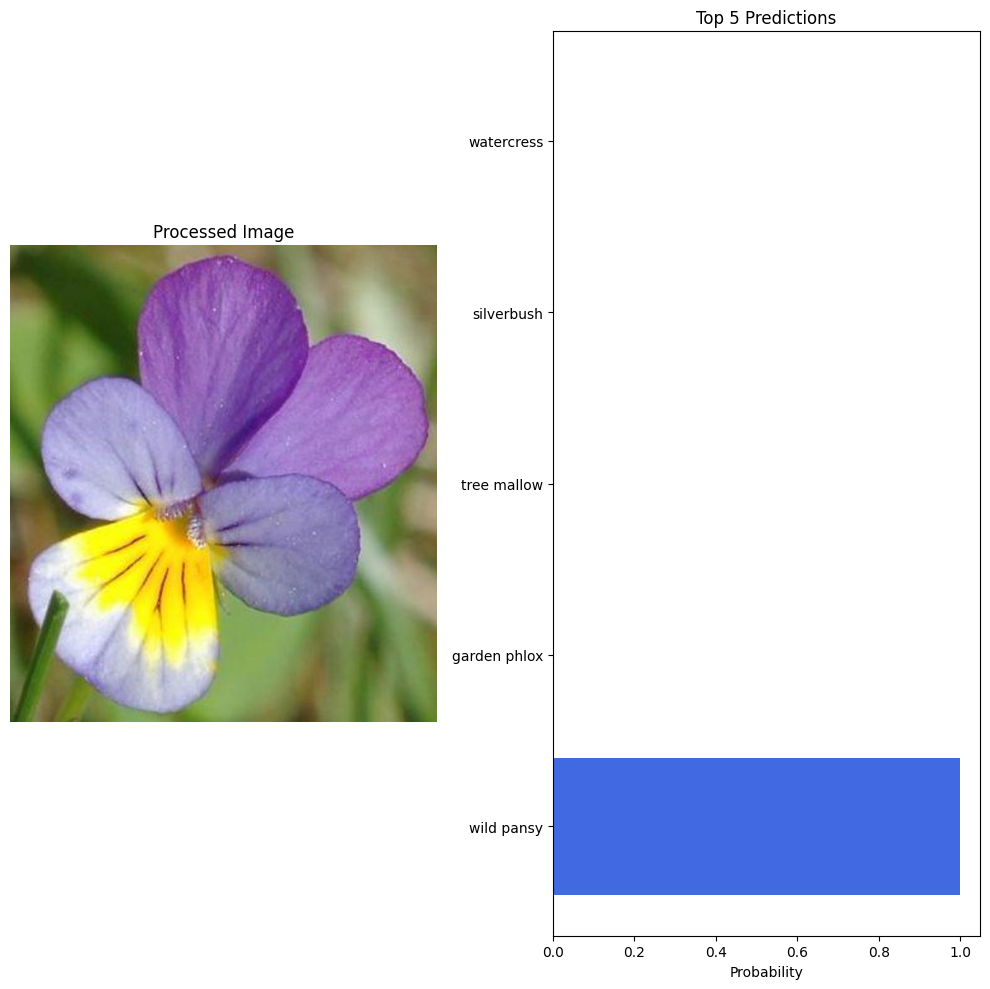

In [30]:
# TODO: Plot the input image along with the top 5 classes
for path in jpg_files:
    image_path = path
    top_k_probs, top_k_classes = predict(image_path, reloaded_model, top_k=5)

    # Print top K probabilities and corresponding class names
    print("Top 5 predictions:")
    for prob, class_name in zip(top_k_probs, top_k_classes):
        print(f"{class_name}: {prob:.4f}")

    # Plot the image and its top K predictions
    image = Image.open(image_path)
    image = np.asarray(image)  # Convert to NumPy array

    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    # Plot original image
    ax[0].imshow(image)
    ax[0].set_title('Processed Image')
    ax[0].axis('off')

    # Plot bar chart of top K predictions
    ax[1].barh(top_k_classes, top_k_probs, color='royalblue')
    ax[1].set_xlabel('Probability')
    ax[1].set_title('Top 5 Predictions')

    plt.tight_layout()
    plt.show()